     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 1/═══════════╩══╩═
                0  0 
Results: {'1': 515, '0': 509}

Таблица результатов измерений:
+---+---------+-----------+
|   | Outcome | Frequency |
+---+---------+-----------+
| 0 |    0    |    509    |
| 1 |    1    |    515    |
+---+---------+-----------+


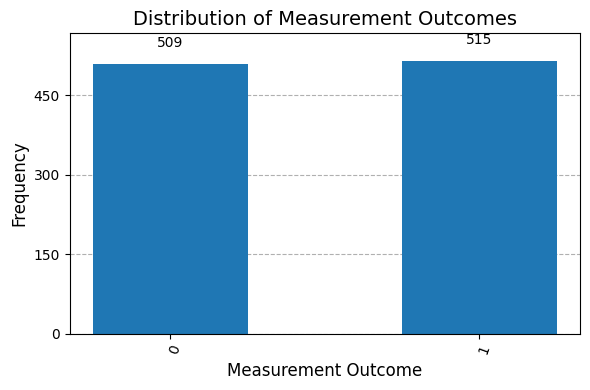

In [9]:
import math

import pandas as pd
from tabulate import tabulate
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[0])

print(circuit)

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit)

print("Results:", counts)
data_table = pd.DataFrame(list(counts.items()), columns=["Outcome", "Frequency"])
data_table = data_table.sort_values(by="Outcome").reset_index(drop=True)  # Сортировка
print("\nТаблица результатов измерений:")
print(tabulate(data_table, headers="keys", tablefmt="pretty"))

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

# Рисуем гистограмму
plot_histogram(counts, bar_labels=True, figsize=(7, 5), ax=ax)

# Настраиваем график
ax.set_title("Distribution of Measurement Outcomes", fontsize=14)  # Название
ax.set_xlabel("Measurement Outcome", fontsize=12)  # Подпись оси X
ax.set_ylabel("Frequency", fontsize=12)  # Подпись оси Y

plt.tight_layout()
plt.show()

Results: {'0': 1024}

Таблица результатов измерений:
+---+---------+-----------+
|   | Outcome | Frequency |
+---+---------+-----------+
| 0 |    0    |   1024    |
+---+---------+-----------+


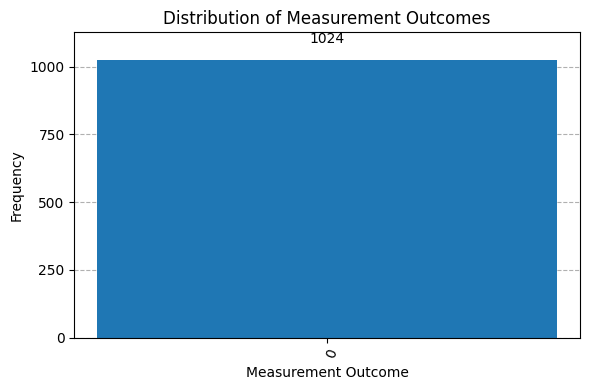

In [10]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[0])

result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit)

print("Results:", counts)
data_table = pd.DataFrame(list(counts.items()), columns=["Outcome", "Frequency"])
data_table = data_table.sort_values(by="Outcome").reset_index(drop=True)  # Сортировка
print("\nТаблица результатов измерений:")
print(tabulate(data_table, headers="keys", tablefmt="pretty"))

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

# Рисуем гистограмму
plot_histogram(counts, bar_labels=True, figsize=(7, 5), ax=ax)

# Настраиваем график
ax.set_title("Distribution of Measurement Outcomes", fontsize=12)  # Название
ax.set_xlabel("Measurement Outcome", fontsize=10)  # Подпись оси X
ax.set_ylabel("Frequency", fontsize=10)  # Подпись оси Y

plt.tight_layout()
plt.show()

In [23]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

shots_list = [1, 2, 8, 32, 64, 128, 512, 1024, 8192]

# Подготовка данных для таблицы
data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Создаем квантовые и классические регистры
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')

# Цикл для разных значений shots
for shots in shots_list:
    # Создаем квантовую цепь
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.h(qreg_q[0])  # Применяем Hadamard
    circuit.measure(qreg_q[0], creg_c[0])  # Измеряем кубит

    # Симуляция
    simulator = AerSimulator()
    result = simulator.run(circuit, shots=shots).result()
    counts = result.get_counts(circuit)  # Получаем результаты измерений

    # Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
    normalized_counts = {key: f"{val / shots:.2f}" for key, val in counts.items()}

    # Добавляем результаты в таблицу
    data["Shots"].append(shots)
    data["|1⟩"].append(counts.get('1', 0))
    data["|0⟩"].append(counts.get('0', 0))
    data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))
    data["Frequency (|0⟩)"].append(normalized_counts.get('0', "1.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+------+------+-----------------+-----------------+
|   | Shots | |1⟩  | |0⟩  | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+------+------+-----------------+-----------------+
| 0 |   1   |  0   |  1   |      0.00       |      1.00       |
| 1 |   2   |  1   |  1   |      0.50       |      0.50       |
| 2 |   8   |  5   |  3   |      0.62       |      0.38       |
| 3 |  32   |  18  |  14  |      0.56       |      0.44       |
| 4 |  64   |  26  |  38  |      0.41       |      0.59       |
| 5 |  128  |  72  |  56  |      0.56       |      0.44       |
| 6 |  512  | 261  | 251  |      0.51       |      0.49       |
| 7 | 1024  | 503  | 521  |      0.49       |      0.51       |
| 8 | 8192  | 4077 | 4115 |      0.50       |      0.50       |
+---+-------+------+------+-----------------+-----------------+


+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 |  512  | 255 | 257 |      0.50       |      0.50       |
+---+-------+-----+-----+-----------------+-----------------+


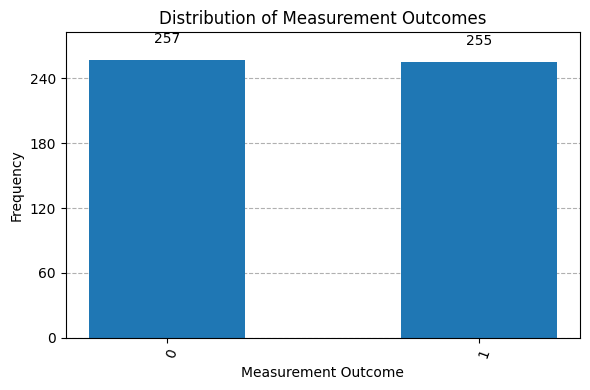

In [6]:
"""LAB 1, 5.5"""

shots_list = [512]

# Подготовка данных для таблицы
data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

for shots in shots_list:
    # Создаем квантовую цепь
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.x(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[0])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.measure(qreg_q[0], creg_c[0])
    circuit.measure(qreg_q[1], creg_c[0])
    # Измеряем кубит

    # Симуляция
    simulator = AerSimulator()
    result = simulator.run(circuit, shots=shots).result()
    counts = result.get_counts(circuit)  # Получаем результаты измерений

    # Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
    normalized_counts = {key: f"{val / shots:.2f}" for key, val in counts.items()}

    # Добавляем результаты в таблицу
    data["Shots"].append(shots)
    data["|1⟩"].append(counts.get('1', 0))
    data["|0⟩"].append(counts.get('0', 0))
    data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))
    data["Frequency (|0⟩)"].append(normalized_counts.get('0', "1.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

# Рисуем гистограмму
plot_histogram(counts, bar_labels=True, figsize=(7, 5), ax=ax)

# Настраиваем график
ax.set_title("Distribution of Measurement Outcomes", fontsize=12)  # Название
ax.set_xlabel("Measurement Outcome", fontsize=10)  # Подпись оси X
ax.set_ylabel("Frequency", fontsize=10)  # Подпись оси Y

plt.tight_layout()
plt.show()

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 |  512  | 260 | 252 |      0.51       |      0.49       |
+---+-------+-----+-----+-----------------+-----------------+


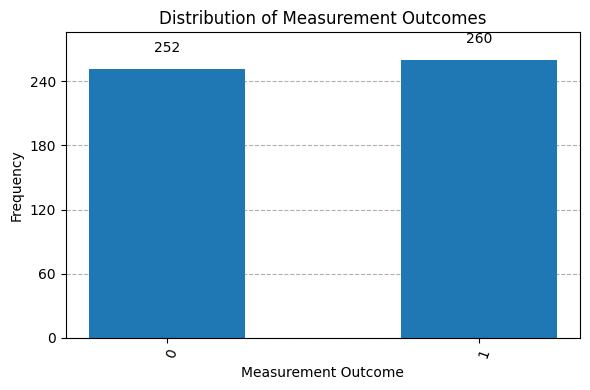

In [11]:
"""LAB 1, 5.5, б"""

shots_list = [512]

# Подготовка данных для таблицы
data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

for shots in shots_list:
    # Создаем квантовую цепь
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.x(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[0])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.measure(qreg_q[0], creg_c[0])
    # Измеряем кубит

    # Симуляция
    simulator = AerSimulator()
    result = simulator.run(circuit, shots=shots).result()
    counts = result.get_counts(circuit)  # Получаем результаты измерений

    # Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
    normalized_counts = {key: f"{val / shots:.2f}" for key, val in counts.items()}

    # Добавляем результаты в таблицу
    data["Shots"].append(shots)
    data["|1⟩"].append(counts.get('1', 0))
    data["|0⟩"].append(counts.get('0', 0))
    data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))
    data["Frequency (|0⟩)"].append(normalized_counts.get('0', "1.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

# Рисуем гистограмму
plot_histogram(counts, bar_labels=True, figsize=(7, 5), ax=ax)

# Настраиваем график
ax.set_title("Distribution of Measurement Outcomes", fontsize=12)  # Название
ax.set_xlabel("Measurement Outcome", fontsize=10)  # Подпись оси X
ax.set_ylabel("Frequency", fontsize=10)  # Подпись оси Y

plt.tight_layout()
plt.show()

In [12]:
"""LAB 1, 5.6, а"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

# Симуляция
simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit)  # Получаем результаты измерений

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.2f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "1.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+------+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩  | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+------+-----------------+-----------------+
| 0 | 1024  |  0  | 1024 |      0.00       |      1.00       |
+---+-------+-----+------+-----------------+-----------------+


In [13]:
"""LAB 1, 5.6, b"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.x(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
# Симуляция
simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit)  # Получаем результаты измерений

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.2f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "1.00"))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+------+-----+-----------------+-----------------+
|   | Shots | |1⟩  | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+------+-----+-----------------+-----------------+
| 0 | 1024  | 1024 |  0  |      1.00       |      0.00       |
+---+-------+------+-----+-----------------+-----------------+


In [14]:
"""LAB 1, 5.6, c"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
# Симуляция
simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit)  # Получаем результаты измерений

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.2f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "1.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 501 | 523 |      0.49       |      0.51       |
+---+-------+-----+-----+-----------------+-----------------+


In [15]:
"""LAB 1, 5.6, d"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.2f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 493 | 531 |      0.48       |      0.52       |
+---+-------+-----+-----+-----------------+-----------------+


In [16]:
"""LAB 1, 5.6, e"""

from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(pi / 3, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.2f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 266 | 758 |      0.26       |      0.74       |
+---+-------+-----+-----+-----------------+-----------------+


In [17]:
"""LAB 1, 5.6, f"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(pi / 3, qreg_q[0])
circuit.x(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.2f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 760 | 264 |      0.74       |      0.26       |
+---+-------+-----+-----+-----------------+-----------------+


In [57]:
"""LAB 1, Упражнение 2, пункт 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 513 | 511 |      0.501      |      0.499      |
+---+-------+-----+-----+-----------------+-----------------+


In [56]:
"""LAB 1, Упражнение 2, пункт 2, способ 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 515 | 509 |      0.503      |      0.497      |
+---+-------+-----+-----+-----------------+-----------------+


In [55]:
"""LAB 1, Упражнение 2, пункт 2, способ 2"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.z(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 496 | 528 |      0.484      |      0.516      |
+---+-------+-----+-----+-----------------+-----------------+


In [63]:
"""LAB 1, Упражнение 2, пункт 3"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.x(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+------+-----+-----------------+-----------------+
|   | Shots | |1⟩  | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+------+-----+-----------------+-----------------+
| 0 | 1024  | 1010 | 14  |      0.986      |      0.014      |
+---+-------+------+-----+-----------------+-----------------+


In [80]:
"""LAB 1, Упражнение 2, пункт 4"""

"""Вариант 1"""
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.rx(0.451027, qreg_q[0])
circuit.p(pi / 2, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))



+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 54  | 970 |      0.053      |      0.947      |
+---+-------+-----+-----+-----------------+-----------------+


In [84]:
"""LAB 1, Упражнение 2, пункт 4, вариант 2"""


"""Вариант 2"""
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])

circuit.rx(0.643501, qreg_q[0])
circuit.p(pi / 2, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))



+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 110 | 914 |      0.107      |      0.893      |
+---+-------+-----+-----+-----------------+-----------------+


In [90]:
"""LAB 1, Упражнение 2, пункт 5, вариант 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.ry(0.451027, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))



+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 56  | 968 |      0.055      |      0.945      |
+---+-------+-----+-----+-----------------+-----------------+


In [91]:
"""LAB 1, Упражнение 2, пункт 5, вариант 2"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.ry(0.643501, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))



+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 112 | 912 |      0.109      |      0.891      |
+---+-------+-----+-----+-----------------+-----------------+


In [92]:
"""LAB 1, Упражнение 2, пункт 6, вариант 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.u(0.451027, 0, 0, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))



+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 49  | 975 |      0.048      |      0.952      |
+---+-------+-----+-----+-----------------+-----------------+


In [93]:
"""LAB 1, Упражнение 2, пункт 6, вариант 2"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.u(0.643501, 0, 0, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 125 | 899 |      0.122      |      0.878      |
+---+-------+-----+-----+-----------------+-----------------+


In [94]:
"""LAB 1, Упражнение 2, пункт 7, вариант 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.rx(0.451027, qreg_q[0])
circuit.p(pi / 2, qreg_q[0])
circuit.z(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 41  | 983 |      0.040      |      0.960      |
+---+-------+-----+-----+-----------------+-----------------+


In [95]:
"""LAB 1, Упражнение 2, пункт 7, вариант 2"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.rx(0.643501, qreg_q[0])
circuit.p(pi / 2, qreg_q[0])
circuit.z(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 93  | 931 |      0.091      |      0.909      |
+---+-------+-----+-----+-----------------+-----------------+


In [96]:
"""LAB 1, Упражнение 2, пункт 8, вариант 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.ry(0.451027, qreg_q[0])
circuit.z(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 50  | 974 |      0.049      |      0.951      |
+---+-------+-----+-----+-----------------+-----------------+


In [97]:
"""LAB 1, Упражнение 2, пункт 8, вариант 2"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.ry(0.643501, qreg_q[0])
circuit.z(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 112 | 912 |      0.109      |      0.891      |
+---+-------+-----+-----+-----------------+-----------------+


In [99]:
"""LAB 1, Упражнение 2, пункт 9, вариант 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.u(0.451027, 0, 0, qreg_q[0])
circuit.x(qreg_q[0])
circuit.z(qreg_q[0])
circuit.x(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 50  | 974 |      0.049      |      0.951      |
+---+-------+-----+-----+-----------------+-----------------+


In [ ]:
"""LAB 1, Упражнение 2, пункт 9, вариант 2"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.u(0.643501, 0, 0, qreg_q[0])
circuit.x(qreg_q[0])
circuit.z(qreg_q[0])
circuit.x(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

In [100]:
"""LAB 1, Упражнение 2, пункт 10, вариант 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.ry(0.451027, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 47  | 977 |      0.046      |      0.954      |
+---+-------+-----+-----+-----------------+-----------------+


In [101]:
"""LAB 1, Упражнение 2, пункт 10, вариант 2"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.ry(0.643501, qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 107 | 917 |      0.104      |      0.896      |
+---+-------+-----+-----+-----------------+-----------------+


In [104]:
"""LAB 1, Упражнение 2, пункт 11, вариант 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.rx(0.451027, qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 519 | 505 |      0.507      |      0.493      |
+---+-------+-----+-----+-----------------+-----------------+


In [105]:
"""LAB 1, Упражнение 2, пункт 11, вариант 2"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.rx(0.643501, qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 529 | 495 |      0.517      |      0.483      |
+---+-------+-----+-----+-----------------+-----------------+


In [106]:
"""LAB 1, Упражнение 2, пункт 12, вариант 1"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.rx(0.451027, qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 61  | 963 |      0.060      |      0.940      |
+---+-------+-----+-----+-----------------+-----------------+


In [107]:
"""LAB 1, Упражнение 2, пункт 12, вариант 2"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.rx(0.643501, qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 89  | 935 |      0.087      |      0.913      |
+---+-------+-----+-----+-----------------+-----------------+


In [108]:
"""LAB 1, Упражнение 2, пункт 13, схема a"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 513 | 511 |      0.501      |      0.499      |
+---+-------+-----+-----+-----------------+-----------------+


In [110]:
"""LAB 1, Упражнение 2, пункт 13, схема b"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 528 | 496 |      0.516      |      0.484      |
+---+-------+-----+-----+-----------------+-----------------+


In [112]:
"""LAB 1, Упражнение 2, пункт 13, схема c"""

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.z(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 490 | 534 |      0.479      |      0.521      |
+---+-------+-----+-----+-----------------+-----------------+


In [3]:
"""LAB 1, Упражнение 2, пункт 14, схема a"""

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 528 | 496 |      0.516      |      0.484      |
+---+-------+-----+-----+-----------------+-----------------+


In [5]:
"""LAB 1, Упражнение 2, пункт 14, схема b"""

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[0])

simulator = AerSimulator()
result = simulator.run(circuit, shots=1024).result()
counts = result.get_counts(circuit) 

# Рассчитываем нормализованные частоты и округляем до двух знаков после запятой
normalized_counts = {key: f"{val / 1024:.3f}" for key, val in counts.items()}

data = {
    "Shots": [],
    "|1⟩": [],
    "|0⟩": [],
    "Frequency (|1⟩)": [],
    "Frequency (|0⟩)": [],
}

# Добавляем результаты в таблицу
data["Shots"].append(1024)
data["|1⟩"].append(counts.get('1', 0))
data["|0⟩"].append(counts.get('0', 0))
data["Frequency (|0⟩)"].append(normalized_counts.get('0', "0.00"))
data["Frequency (|1⟩)"].append(normalized_counts.get('1', "0.00"))

# Создаем DataFrame
df = pd.DataFrame(data)

# Вывод таблицы с выравниванием по центру
print(tabulate(df, headers="keys", tablefmt="pretty", stralign="center"))

+---+-------+-----+-----+-----------------+-----------------+
|   | Shots | |1⟩ | |0⟩ | Frequency (|1⟩) | Frequency (|0⟩) |
+---+-------+-----+-----+-----------------+-----------------+
| 0 | 1024  | 497 | 527 |      0.485      |      0.515      |
+---+-------+-----+-----+-----------------+-----------------+
